In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!git clone https://github.com/AruneemaXD/nnfl-assignment1.git
np.random.seed(7)


fatal: destination path 'nnfl-assignment1' already exists and is not an empty directory.


In [ ]:
def sigmoid(x):
	return 1.0/(1+np.exp(-x))

def sigmoid_der(x):
	return sigmoid(x)*(1-sigmoid(x))

def log_loss(y,y_hat):
	l= -y*np.log(y_hat)
	l-=(1-y)*np.log(1-y_hat)
	return l

def predict(X,w):
	z= X.dot(w)
	y_hat= sigmoid(z)
	y_hat= [1 if y>=0.5 else 0 for y in y_hat]
	return y_hat

### Stocastic Gradient Descent

Learning rate: 0.05


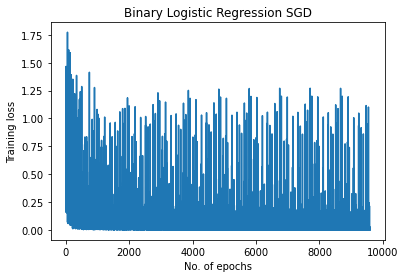

Loss 0.0017184339831335933
True Positives:  183
False Positives:  13
True Negatives:  215
False Negatives:  1
The recall is 0.9945652173913043
The specificity is 0.9429824561403509
The training accuracy is 96.60194174757282%

Learning rate: 0.5


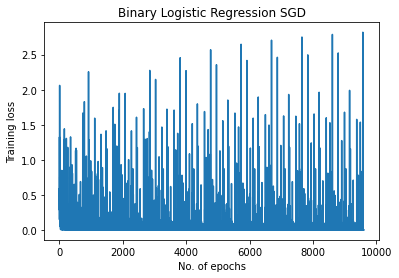

Loss 2.209303344515456e-07
True Positives:  178
False Positives:  4
True Negatives:  227
False Negatives:  3
The recall is 0.9834254143646409
The specificity is 0.9826839826839827
The training accuracy is 98.30097087378641%

Learning rate: 1


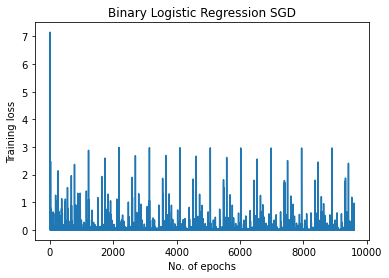

Loss 9.553059869856356e-07
True Positives:  177
False Positives:  2
True Negatives:  228
False Negatives:  5
The recall is 0.9725274725274725
The specificity is 0.991304347826087
The training accuracy is 98.30097087378641%



In [ ]:
df= pd.read_csv('nnfl-assignment1/dataset_LR.csv')
listlr = [0.05,0.5,1]
for l in range(3):
  lr=listlr[l]
  epochs=200
  print("Learning rate: {0}".format(lr))
  data= np.array(df)
  X= data[:,:-1]
  Xmean=np.mean(X,axis=0)
  Xstd=np.std(X,axis=0)

  # Shuffle the dataset 
  shuffle_df = df.sample(frac=1)

  # Train size = 70%  
  train_size = int(0.7 * len(df))

  # Split the dataset 
  train_set = shuffle_df[:train_size]
  test_set = shuffle_df[train_size:]

  data= np.array(df)
  #Features 
  X_train= (np.array(train_set)[:,:-1] - Xmean)/Xstd
  X_test= (np.array(test_set)[:,:-1] -  Xmean)/Xstd
  #Adding column of ones
  trainbias= np.ones((X_train.shape[0],1))
  testbias= np.ones((X_test.shape[0],1)) 
  X_train= np.hstack((X_train,trainbias))
  X_test= np.hstack((X_test,testbias))
  #Last column of data = y	
  y_train= np.array(train_set)[:,-1]
  y_test= np.array(test_set)[:,-1]	


  #Random Weights
  w= np.random.randn(X_train.shape[1])
  losses=[]

  for e in range(10):
    for i in range(X_train.shape[0]):
      z= X_train[i].dot(w)
      y_hat= sigmoid(z)
      loss= log_loss(y_train[i],y_hat)
      epoch_loss= np.sum(loss)
      losses.append(epoch_loss)
      temp= y_hat-y_train[i]
      temp= temp.reshape(1,1)
      loss_der= temp*X_train[i]
      grad= loss_der.mean(axis=0)
      w-=lr*grad
    if not (e*i + i)%50:
      print("Epoch: {0} Loss: {1}".format((e*i + i),losses[-1]))




  plt.plot(losses)
  plt.title('Binary Logistic Regression SGD',loc='center')
  plt.xlabel('No. of epochs')
  plt.ylabel('Training loss')
  plt.show()
  print("Loss {0}".format(losses[-1]))

  y_pred= predict(X_test,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity= tn/(tn+fp)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("True Positives: ",tp)
  print("False Positives: ",fp)
  print("True Negatives: ",tn)
  print("False Negatives: ",fn)
  print("The recall is {0}".format(recall))
  print("The specificity is {0}".format(specificity))

  print("The training accuracy is {0}%\n".format(accuracy*100))
  
  

Split 1


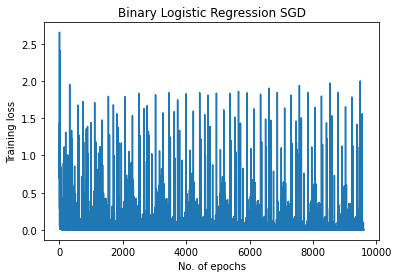

Loss 3.2134746713664104e-08
True Positives:  179
False Positives:  2
True Negatives:  230
False Negatives:  1
The recall is 0.9944444444444445
The specificity is 0.9913793103448276
The training accuracy is 99.27184466019418%

Split 2


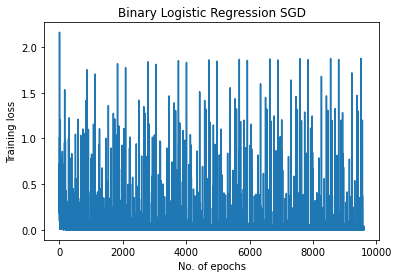

Loss 3.0265577403148964e-05
True Positives:  176
False Positives:  4
True Negatives:  230
False Negatives:  2
The recall is 0.9887640449438202
The specificity is 0.9829059829059829
The training accuracy is 98.54368932038835%

Split 3


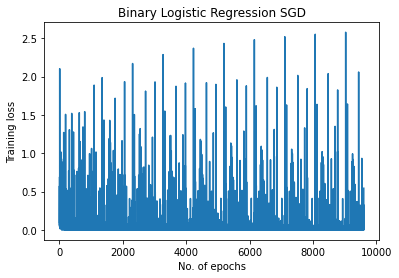

Loss 0.5433198849558804
True Positives:  199
False Positives:  5
True Negatives:  206
False Negatives:  2
The recall is 0.9900497512437811
The specificity is 0.976303317535545
The training accuracy is 98.30097087378641%

Split 4


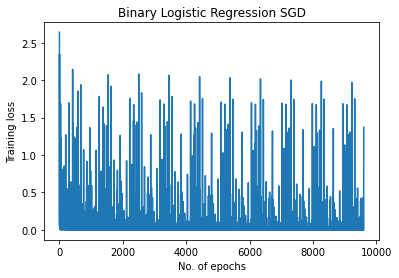

Loss 1.371362615510762
True Positives:  177
False Positives:  3
True Negatives:  232
False Negatives:  0
The recall is 1.0
The specificity is 0.9872340425531915
The training accuracy is 99.27184466019418%

Split 5


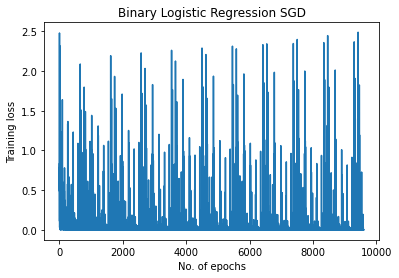

Loss 0.00014531810287550073
True Positives:  173
False Positives:  2
True Negatives:  237
False Negatives:  0
The recall is 1.0
The specificity is 0.9916317991631799
The training accuracy is 99.51456310679612%

Split 6


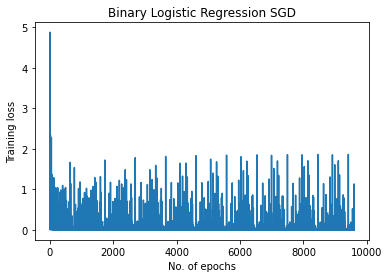

Loss 0.00026477426076265584
True Positives:  185
False Positives:  3
True Negatives:  222
False Negatives:  2
The recall is 0.9893048128342246
The specificity is 0.9866666666666667
The training accuracy is 98.7864077669903%

Split 7


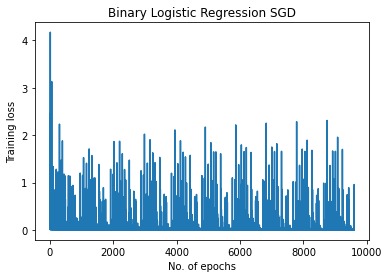

Loss 3.619700560405733e-08
True Positives:  177
False Positives:  7
True Negatives:  227
False Negatives:  1
The recall is 0.9943820224719101
The specificity is 0.9700854700854701
The training accuracy is 98.05825242718447%

Split 8


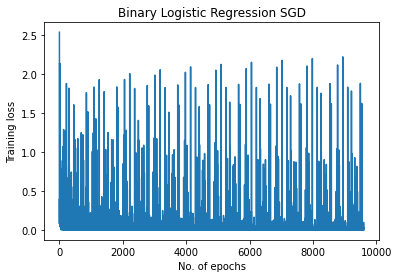

Loss 0.025910340670269053
True Positives:  194
False Positives:  4
True Negatives:  211
False Negatives:  3
The recall is 0.9847715736040609
The specificity is 0.9813953488372092
The training accuracy is 98.30097087378641%

Split 9


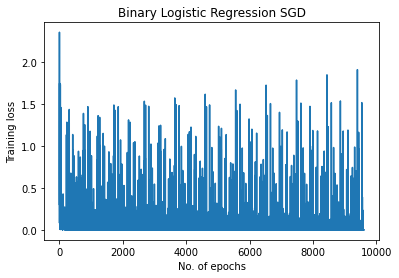

Loss 4.1551617710772904e-10
True Positives:  183
False Positives:  1
True Negatives:  226
False Negatives:  2
The recall is 0.9891891891891892
The specificity is 0.9955947136563876
The training accuracy is 99.27184466019418%

Split 10


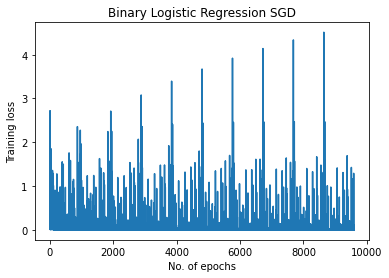

Loss 7.253433602024384e-07
True Positives:  178
False Positives:  2
True Negatives:  221
False Negatives:  11
The recall is 0.9417989417989417
The specificity is 0.9910313901345291
The training accuracy is 96.84466019417476%



In [ ]:
avgaccuracy = 0
avgloss = 0
avgpre = 0
avgrecall = 0
avgfscore = 0
avgaccuracy_train = 0
avgpre_train = 0
avgrecall_train = 0
avgfscore_train = 0
for s in range(10):
  epochs=200
  lr=0.5
  print("Split {0}".format(s+1))
  data= np.array(df)
  X= data[:,:-1]
  Xmean=np.mean(X,axis=0)
  Xstd=np.std(X,axis=0)

  # Shuffle the dataset 
  shuffle_df = df.sample(frac=1)

  # Train size = 70%  
  train_size = int(0.7 * len(df))

  # Split the dataset 
  train_set = shuffle_df[:train_size]
  test_set = shuffle_df[train_size:]

  data= np.array(df)
  #Features 
  X_train= (np.array(train_set)[:,:-1] - Xmean)/Xstd
  X_test= (np.array(test_set)[:,:-1] -  Xmean)/Xstd
  #Adding column of ones
  trainbias= np.ones((X_train.shape[0],1))
  testbias= np.ones((X_test.shape[0],1)) 
  X_train= np.hstack((X_train,trainbias))
  X_test= np.hstack((X_test,testbias))
  #Last column of data = y	
  y_train= np.array(train_set)[:,-1]
  y_test= np.array(test_set)[:,-1]	


  #Random Weights
  w= np.random.randn(X_train.shape[1])
  losses=[]

  for e in range(10):
    for i in range(X_train.shape[0]):
      z= X_train[i].dot(w)
      y_hat= sigmoid(z)
      loss= log_loss(y_train[i],y_hat)
      epoch_loss= np.sum(loss)
      losses.append(epoch_loss)
      temp= y_hat-y_train[i]
      temp= temp.reshape(1,1)
      loss_der= temp*X_train[i]
      grad= loss_der.mean(axis=0)
      w-=lr*grad
    if not (e*i + i)%50:
      print("Epoch: {0} Loss: {1}".format((e*i + i),losses[-1]))



  
  plt.plot(losses)
  plt.title('Binary Logistic Regression SGD',loc='center')
  plt.xlabel('No. of epochs')
  plt.ylabel('Training loss')
  plt.show()
  print("Loss {0}".format(losses[-1]))
  avgloss += (losses[-1]/10)

  y_pred= predict(X_test,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity = tn/(tn+fp)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)
  accuracy= (tp+tn)/(tp+tn+fp+fn)


  print("True Positives: ",tp)
  print("False Positives: ",fp)
  print("True Negatives: ",tn)
  print("False Negatives: ",fn)
  print("The recall is {0}".format(recall))
  print("The specificity is {0}".format(specificity))
  print("The training accuracy is {0}%\n".format(accuracy*100))
  avgaccuracy += accuracy
  avgpre += precision
  avgrecall += recall
  avgfscore += fscore


  y_pred= predict(X_train,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity= tn/(tn+fp)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)
  accuracy= (tp+tn)/(tp+tn+fp+fn)
  avgaccuracy_train += accuracy
  avgpre_train += precision
  avgrecall_train += recall
  avgfscore_train += fscore

  
  






In [ ]:
  print("The average loss is {0}".format(avgloss))
  print("The average training accuracy is {0}%".format(avgaccuracy_train*10))
  print("The average testing accuracy is {0}%".format(avgaccuracy*10))
  print("The average training precision is {0}".format(avgpre_train/10))
  print("The average testing precision is {0}".format(avgpre/10))
  print("The average training recall is {0}".format(avgrecall_train/10))
  print("The average testing recall is {0}".format(avgrecall/10))
  print("The average training fscore is {0}".format(avgfscore_train/10))
  print("The average testing fscore is {0}".format(avgfscore/10))
  print("Weight values {0}\n".format(w))
  

The average loss is 0.19410339931685816
The average training accuracy is 49.781553398058264%
The average testing accuracy is 98.61650485436894%
The average training precision is 0.4393707764227813
The average testing precision is 0.9823374173012859
The average training recall is 0.43595726166315824
The average testing recall is 0.9872704780530371
The average training fscore is 0.4370789692453278
The average testing fscore is 0.9846980802318781
Weight values [ -9.37303701 -10.38141661 -10.59145595  -0.05186701  -4.39437457]



### Gradient Descent

Learning rate: 0.05
Epoch: 0 Loss: 0.7957586990942278
Epoch: 50 Loss: 0.42405947627500223
Epoch: 100 Loss: 0.33275041837331154
Epoch: 150 Loss: 0.28618973043763324
Epoch: 200 Loss: 0.25501732667184623
Epoch: 250 Loss: 0.23166244782616657
Epoch: 300 Loss: 0.2131460599399268
Epoch: 350 Loss: 0.19796878789219063
Epoch: 400 Loss: 0.18524937620117915
Epoch: 450 Loss: 0.1744150839045479


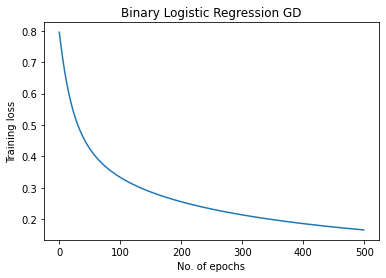

Loss 0.16524240980966917
True Positives:  185
False Positives:  10
True Negatives:  214
False Negatives:  3
The recall is 0.9840425531914894
The specificity is 0.9553571428571429
The training accuracy is 96.84466019417476 %

Learning rate: 0.5
Epoch: 0 Loss: 0.6105601035510294
Epoch: 50 Loss: 0.16545578557966095
Epoch: 100 Loss: 0.11445834133698153
Epoch: 150 Loss: 0.09357935541209755
Epoch: 200 Loss: 0.08191636955408228
Epoch: 250 Loss: 0.074334534504688
Epoch: 300 Loss: 0.06894192673717855
Epoch: 350 Loss: 0.0648710610764751
Epoch: 400 Loss: 0.06166518292496169
Epoch: 450 Loss: 0.05905954407459324


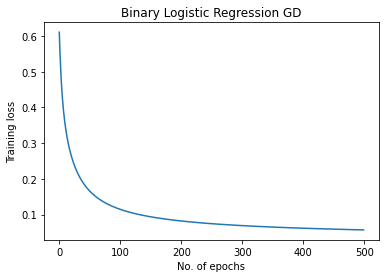

Loss 0.0569293098248433
True Positives:  181
False Positives:  7
True Negatives:  224
False Negatives:  0
The recall is 1.0
The specificity is 0.9696969696969697
The training accuracy is 98.30097087378641 %

Learning rate: 1
Epoch: 0 Loss: 1.308374599365185
Epoch: 50 Loss: 0.12522882838401622
Epoch: 100 Loss: 0.08259982324743716
Epoch: 150 Loss: 0.06750811586956287
Epoch: 200 Loss: 0.05948303049671063
Epoch: 250 Loss: 0.054364836364679654
Epoch: 300 Loss: 0.050746912706517835
Epoch: 350 Loss: 0.04801521763849044
Epoch: 400 Loss: 0.045856310830582454
Epoch: 450 Loss: 0.04409221500993219


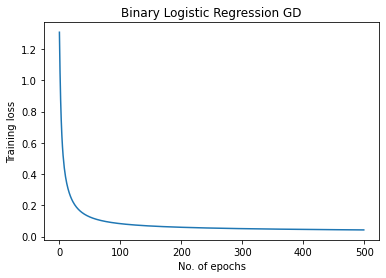

Loss 0.04264100055740044
True Positives:  181
False Positives:  7
True Negatives:  223
False Negatives:  1
The recall is 0.9945054945054945
The specificity is 0.9695652173913043
The training accuracy is 98.05825242718447 %



In [ ]:
for l in range(3):
  lr=listlr[l]
  epochs=500
  print("Learning rate: {0}".format(lr))

  data= np.array(df)
  X= data[:,:-1]
  Xmean=np.mean(X,axis=0)
  Xstd=np.std(X,axis=0)

  # Shuffle the dataset 
  shuffle_df = df.sample(frac=1)

  # Train size = 70%  
  train_size = int(0.7 * len(df))

  # Split the dataset 
  train_set = shuffle_df[:train_size]
  test_set = shuffle_df[train_size:]

  data= np.array(df)
  #Features 
  X_train= (np.array(train_set)[:,:-1] - Xmean)/Xstd
  X_test= (np.array(test_set)[:,:-1] -  Xmean)/Xstd
  #Adding column of ones
  trainbias= np.ones((X_train.shape[0],1))
  testbias= np.ones((X_test.shape[0],1)) 
  X_train= np.hstack((X_train,trainbias))
  X_test= np.hstack((X_test,testbias))
  #Last column of data = y	
  y_train= np.array(train_set)[:,-1]
  y_test= np.array(test_set)[:,-1]	


  #Random Weights
  w= np.random.randn(X_train.shape[1])
  losses=[]

  for e in range(epochs):
    z= X_train.dot(w)
    y_hat= sigmoid(z)
    loss= log_loss(y_train,y_hat)
    epoch_loss= np.sum(loss)/y_train.shape[0]
    losses.append(epoch_loss)
    temp= y_hat-y_train
    temp= temp.reshape(y_train.shape[0],1)
    loss_der= temp*X_train
    grad= loss_der.mean(axis=0)
    w-=lr*grad
    if not e%50:
      print("Epoch: {0} Loss: {1}".format(e,losses[-1]))




  plt.plot(losses)
  plt.title('Binary Logistic Regression GD',loc='center')
  plt.xlabel('No. of epochs')
  plt.ylabel('Training loss')
  plt.show()
  print("Loss {0}".format(losses[-1]))

  y_pred= predict(X_test,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity= tn/(tn+fp)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("True Positives: ",tp)
  print("False Positives: ",fp)
  print("True Negatives: ",tn)
  print("False Negatives: ",fn)
  print("The recall is {0}".format(recall))
  print("The specificity is {0}".format(specificity))
  print("The training accuracy is {0} %\n".format(accuracy*100))

  
  






Split 1
Epoch: 0 Loss: 1.2968970893696095
Epoch: 50 Loss: 0.446189957208096
Epoch: 100 Loss: 0.27367881800237953
Epoch: 150 Loss: 0.2312835339279337
Epoch: 200 Loss: 0.2092240848923441
Epoch: 250 Loss: 0.19363180329390428
Epoch: 300 Loss: 0.18132631904296273
Epoch: 350 Loss: 0.17112190409286107
Epoch: 400 Loss: 0.16242505421408507
Epoch: 450 Loss: 0.1548813634580307


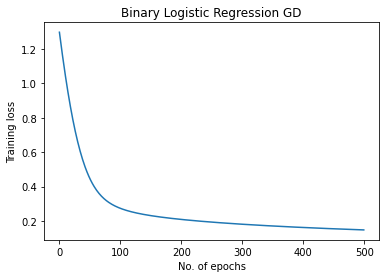

Loss 0.14837964097890252
True Positives:  187
False Positives:  10
True Negatives:  212
False Negatives:  3
The recall is 0.9842105263157894
The specificity is 0.954954954954955
The training accuracy is 96.84466019417476 %

Split 2
Epoch: 0 Loss: 0.3875107794906062
Epoch: 50 Loss: 0.3158508770701737
Epoch: 100 Loss: 0.27176813673096734
Epoch: 150 Loss: 0.24080506547152022
Epoch: 200 Loss: 0.2174671716377506
Epoch: 250 Loss: 0.19911595328027867
Epoch: 300 Loss: 0.18426527814703128
Epoch: 350 Loss: 0.17198717067090746
Epoch: 400 Loss: 0.16166160462356507
Epoch: 450 Loss: 0.15285461682987905


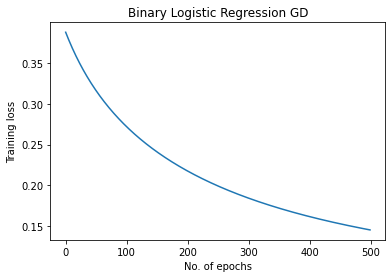

Loss 0.14539391497651433
True Positives:  186
False Positives:  13
True Negatives:  211
False Negatives:  2
The recall is 0.9893617021276596
The specificity is 0.9419642857142857
The training accuracy is 96.35922330097088 %

Split 3
Epoch: 0 Loss: 0.5863739134370799
Epoch: 50 Loss: 0.3292358626133251
Epoch: 100 Loss: 0.2601598774681076
Epoch: 150 Loss: 0.22565067761285185
Epoch: 200 Loss: 0.20335252652522798
Epoch: 250 Loss: 0.18707643895873965
Epoch: 300 Loss: 0.17436181804412745
Epoch: 350 Loss: 0.16400351769278096
Epoch: 400 Loss: 0.1553240074092982
Epoch: 450 Loss: 0.14790329929626753


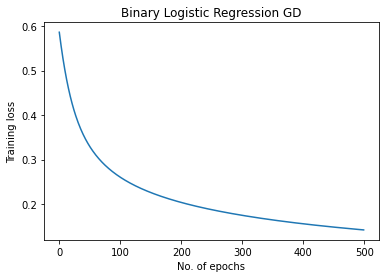

Loss 0.14158233341751641
True Positives:  165
False Positives:  9
True Negatives:  236
False Negatives:  2
The recall is 0.9880239520958084
The specificity is 0.963265306122449
The training accuracy is 97.33009708737865 %

Split 4
Epoch: 0 Loss: 1.7229070384421665
Epoch: 50 Loss: 0.7780620082541124
Epoch: 100 Loss: 0.5114132049892486
Epoch: 150 Loss: 0.40359395747077725
Epoch: 200 Loss: 0.34122785629926733
Epoch: 250 Loss: 0.2984708626659787
Epoch: 300 Loss: 0.26660507811189293
Epoch: 350 Loss: 0.2417111080271124
Epoch: 400 Loss: 0.22166404131812556
Epoch: 450 Loss: 0.2051640818706702


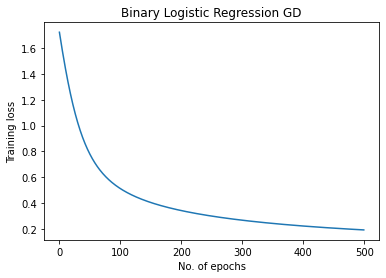

Loss 0.19160546690159588
True Positives:  177
False Positives:  13
True Negatives:  215
False Negatives:  7
The recall is 0.9619565217391305
The specificity is 0.9429824561403509
The training accuracy is 95.14563106796116 %

Split 5
Epoch: 0 Loss: 0.9289750552663275
Epoch: 50 Loss: 0.5358452197112376
Epoch: 100 Loss: 0.41991090425093275
Epoch: 150 Loss: 0.35357337000281036
Epoch: 200 Loss: 0.307728896954422
Epoch: 250 Loss: 0.2735493048521039
Epoch: 300 Loss: 0.24697960832135593
Epoch: 350 Loss: 0.2257378601638565
Epoch: 400 Loss: 0.20839021605864533
Epoch: 450 Loss: 0.193975272000062


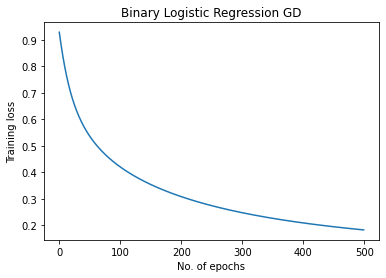

Loss 0.18204496755919972
True Positives:  162
False Positives:  9
True Negatives:  238
False Negatives:  3
The recall is 0.9818181818181818
The specificity is 0.9635627530364372
The training accuracy is 97.0873786407767 %

Split 6
Epoch: 0 Loss: 0.8243456018464381
Epoch: 50 Loss: 0.4102686686558446
Epoch: 100 Loss: 0.29757783418503
Epoch: 150 Loss: 0.2502442032034011
Epoch: 200 Loss: 0.2224330061839685
Epoch: 250 Loss: 0.20308088616703288
Epoch: 300 Loss: 0.18830510175049245
Epoch: 350 Loss: 0.17639437085370216
Epoch: 400 Loss: 0.1664628556893834
Epoch: 450 Loss: 0.15799246751747056


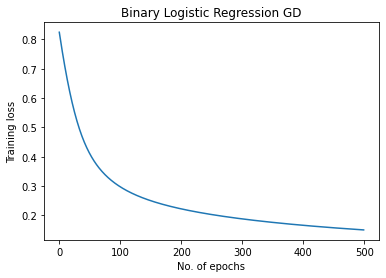

Loss 0.1507880585296513
True Positives:  168
False Positives:  8
True Negatives:  234
False Negatives:  2
The recall is 0.9882352941176471
The specificity is 0.9669421487603306
The training accuracy is 97.57281553398059 %

Split 7
Epoch: 0 Loss: 2.2475476934554406
Epoch: 50 Loss: 1.002710004803632
Epoch: 100 Loss: 0.5617413317455103
Epoch: 150 Loss: 0.43022266090269384
Epoch: 200 Loss: 0.3627008443271512
Epoch: 250 Loss: 0.3175219828077776
Epoch: 300 Loss: 0.2838011064745525
Epoch: 350 Loss: 0.25726188388478044
Epoch: 400 Loss: 0.2357266232261933
Epoch: 450 Loss: 0.21789064444830622


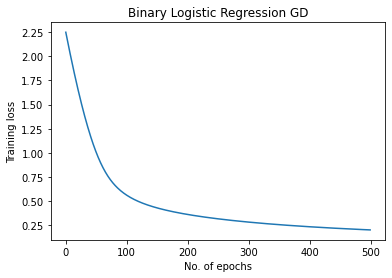

Loss 0.2031662471657045
True Positives:  171
False Positives:  9
True Negatives:  218
False Negatives:  14
The recall is 0.9243243243243243
The specificity is 0.960352422907489
The training accuracy is 94.41747572815534 %

Split 8
Epoch: 0 Loss: 1.3659729304405457
Epoch: 50 Loss: 0.6564980499018205
Epoch: 100 Loss: 0.4653612702383735
Epoch: 150 Loss: 0.38173182314830856
Epoch: 200 Loss: 0.3286053526597346
Epoch: 250 Loss: 0.2898326689905117
Epoch: 300 Loss: 0.25985856347459785
Epoch: 350 Loss: 0.23595003930226016
Epoch: 400 Loss: 0.21646657092351193
Epoch: 450 Loss: 0.2003190580975995


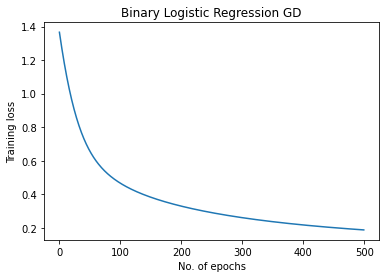

Loss 0.18699483948437431
True Positives:  174
False Positives:  15
True Negatives:  220
False Negatives:  3
The recall is 0.9830508474576272
The specificity is 0.9361702127659575
The training accuracy is 95.63106796116504 %

Split 9
Epoch: 0 Loss: 2.0077900668206246
Epoch: 50 Loss: 0.8237787753856938
Epoch: 100 Loss: 0.4921097207476762
Epoch: 150 Loss: 0.3912474723899965
Epoch: 200 Loss: 0.3369497875623632
Epoch: 250 Loss: 0.2992655573119897
Epoch: 300 Loss: 0.270374606993293
Epoch: 350 Loss: 0.24714725524959777
Epoch: 400 Loss: 0.22796312466969038
Epoch: 450 Loss: 0.21183692849731758


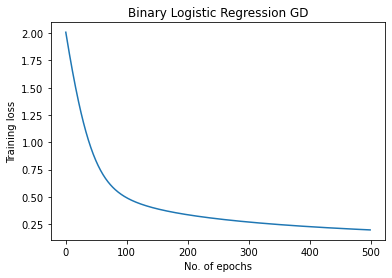

Loss 0.19835976005588207
True Positives:  160
False Positives:  11
True Negatives:  219
False Negatives:  22
The recall is 0.8791208791208791
The specificity is 0.9521739130434783
The training accuracy is 91.99029126213593 %

Split 10
Epoch: 0 Loss: 1.0830186108402358
Epoch: 50 Loss: 0.3691671787900051
Epoch: 100 Loss: 0.2540753694467595
Epoch: 150 Loss: 0.21747043886211656
Epoch: 200 Loss: 0.19700317465448117
Epoch: 250 Loss: 0.18259123116615109
Epoch: 300 Loss: 0.17133134118837606
Epoch: 350 Loss: 0.1620460606716048
Epoch: 400 Loss: 0.1541437371408502
Epoch: 450 Loss: 0.14728069315308995


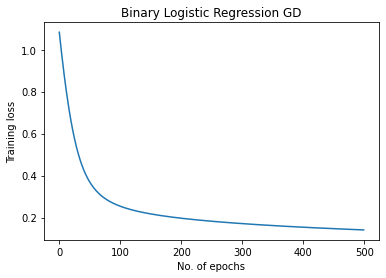

Loss 0.14134966171405708
True Positives:  186
False Positives:  6
True Negatives:  213
False Negatives:  7
The recall is 0.9637305699481865
The specificity is 0.9726027397260274
The training accuracy is 96.84466019417476 %



In [ ]:
avgaccuracy = 0
avgloss = 0
avgpre = 0
avgrecall = 0
avgfscore = 0
avgaccuracy_train = 0
avgloss_train = 0
avgpre_train = 0
avgrecall_train = 0
avgfscore_train = 0
for s in range(10):
  epochs=500
  lr=0.05
  print("Split {0}".format(s+1))

  data= np.array(df)
  X= data[:,:-1]
  Xmean=np.mean(X,axis=0)
  Xstd=np.std(X,axis=0)

  # Shuffle the dataset 
  shuffle_df = df.sample(frac=1)

  # Train size = 70%  
  train_size = int(0.7 * len(df))

  # Split the dataset 
  train_set = shuffle_df[:train_size]
  test_set = shuffle_df[train_size:]

  data= np.array(df)
  #Features 
  X_train= (np.array(train_set)[:,:-1] - Xmean)/Xstd
  X_test= (np.array(test_set)[:,:-1] -  Xmean)/Xstd
  #Adding column of ones
  trainbias= np.ones((X_train.shape[0],1))
  testbias= np.ones((X_test.shape[0],1)) 
  X_train= np.hstack((X_train,trainbias))
  X_test= np.hstack((X_test,testbias))
  #Last column of data = y	
  y_train= np.array(train_set)[:,-1]
  y_test= np.array(test_set)[:,-1]	


  #Random Weights
  w= np.random.randn(X_train.shape[1])
  losses=[]

  for e in range(epochs):
    z= X_train.dot(w)
    y_hat= sigmoid(z)
    loss= log_loss(y_train,y_hat)
    epoch_loss= np.sum(loss)/y_train.shape[0]
    losses.append(epoch_loss)
    temp= y_hat-y_train
    temp= temp.reshape(y_train.shape[0],1)
    loss_der= temp*X_train
    grad= loss_der.mean(axis=0)
    w-=lr*grad
    if not e%50:
      print("Epoch: {0} Loss: {1}".format(e,losses[-1]))




  plt.plot(losses)
  plt.title('Binary Logistic Regression GD',loc='center')
  plt.xlabel('No. of epochs')
  plt.ylabel('Training loss')
  plt.show()
  print("Loss {0}".format(losses[-1]))
  avgloss += (losses[-1]/10)

  y_pred= predict(X_test,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity= tn/(tn+fp)
  accuracy= (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)

  print("True Positives: ",tp)
  print("False Positives: ",fp)
  print("True Negatives: ",tn)
  print("False Negatives: ",fn)
  print("The recall is {0}".format(recall))
  print("The specificity is {0}".format(specificity))
  print("The training accuracy is {0} %\n".format(accuracy*100))
  avgaccuracy += accuracy
  avgpre += precision
  avgrecall += recall
  avgfscore += fscore
  


  y_pred= predict(X_train,w)

  #for i in range(len(y_pred)):
    #print("Predicted: {0}  Actual:{1}".format(y_pred[i]+1,round(y_test[i])+1))
  
  #f=false t=true p=positive n=negative
  fp=0
  fn=0
  tp=0
  tn=0

  for i in range(len(X_test)):
    if y_test[i]==1:
      if y_pred[i]==1:
        tp+=1
      else:
        fn+=1
    else:
      if y_pred[i]==0:
        tn+=1
      else:
        fp+=1

  recall= tp/(tp+fn)
  specificity= tn/(tn+fp)
  precision = tp/(tp+fp)
  fscore = (2*precision*recall)/(recall+precision)
  accuracy= (tp+tn)/(tp+tn+fp+fn)
  avgaccuracy_train += accuracy
  avgpre_train += precision
  avgrecall_train += recall
  avgfscore_train += fscore

  
  




In [ ]:
print("The average training accuracy is {0}%".format(avgaccuracy_train*10))
print("The average testing accuracy is {0}%".format(avgaccuracy*10))
print("The average training precision is {0}".format(avgpre_train/10))
print("The average testing precision is {0}".format(avgpre/10))
print("The average training recall is {0}".format(avgrecall_train/10))
print("The average testing recall is {0}".format(avgrecall/10))
print("The average training fscore is {0}".format(avgfscore_train/10))
print("The average testing fscore is {0}".format(avgfscore/10))
print("Weight values {0}\n".format(w))

The average training accuracy is 50.315533980582515%
The average testing accuracy is 95.92233009708738%
The average training precision is 0.4358592250763067
The average testing precision is 0.9440738065804652
The average training recall is 0.46080083961731216
The average testing recall is 0.9643832799065233
The average training fscore is 0.4473309930332297
The average testing fscore is 0.9537853879119351
Weight values [-2.64334116 -1.74161463 -1.59323952  0.30357441 -0.44440342]

